In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 79.3 MB/s eta 0:00:00


Ahmedabad - Original Min: 0.0, Original Max: 0.00013568905757201585
Ahmedabad - Normalized Min: 0.0, Normalized Max: 0.9596777233775292
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Ahmedabad_AQI_Normalized.tif


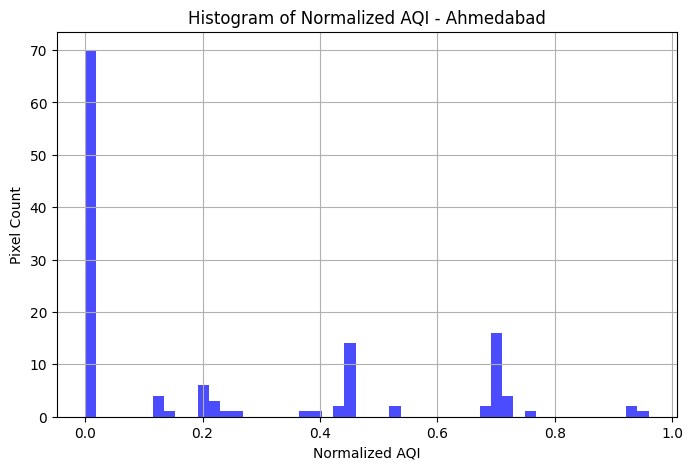

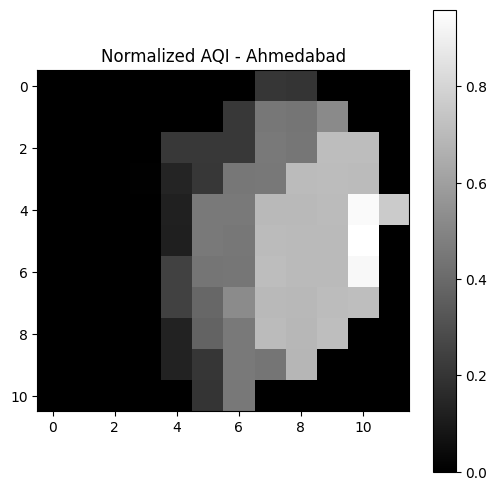

Bengaluru - Original Min: 0.0, Original Max: 9.296336410304175e-05
Bengaluru - Normalized Min: 0.0, Normalized Max: 0.013765395039834974
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Bengaluru_AQI_Normalized.tif


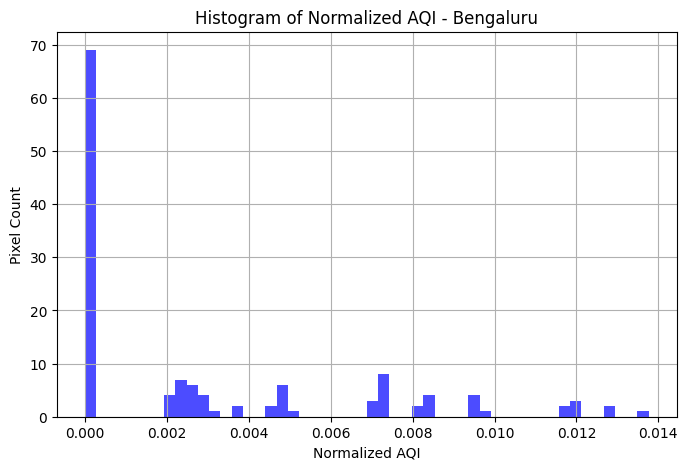

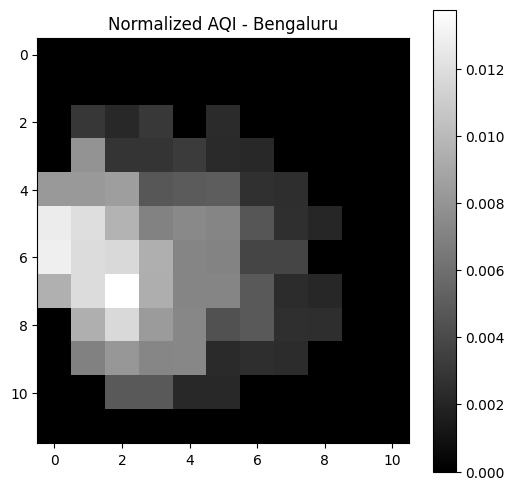

Chennai - Original Min: 0.0, Original Max: 9.255958496378629e-05
Chennai - Normalized Min: 0.0, Normalized Max: 0.9179034920657281
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Chennai_AQI_Normalized.tif


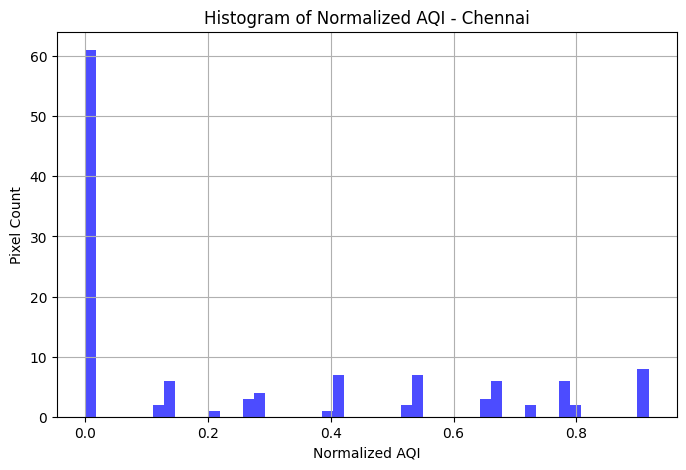

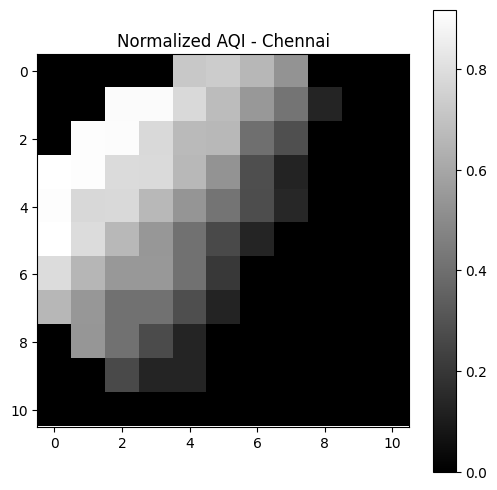

Delhi - Original Min: 0.0, Original Max: 0.000156000211245935
Delhi - Normalized Min: 0.0, Normalized Max: 1.0
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Delhi_AQI_Normalized.tif


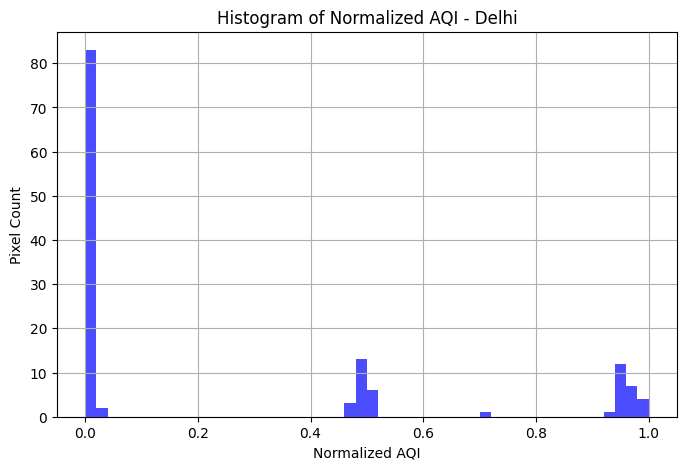

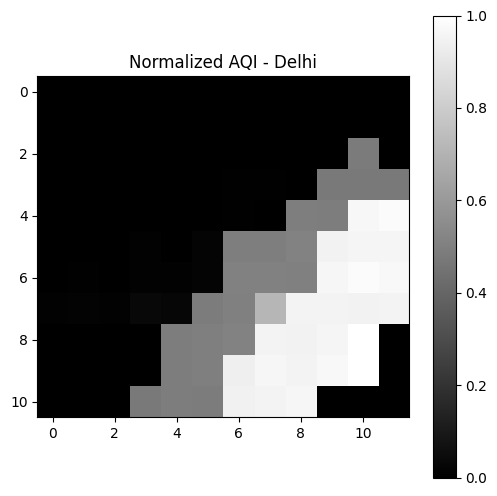

Hyderabad - Original Min: 0.0, Original Max: 0.00010773189918871867
Hyderabad - Normalized Min: 0.0, Normalized Max: 0.7644288153343092
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Hyderabad_AQI_Normalized.tif


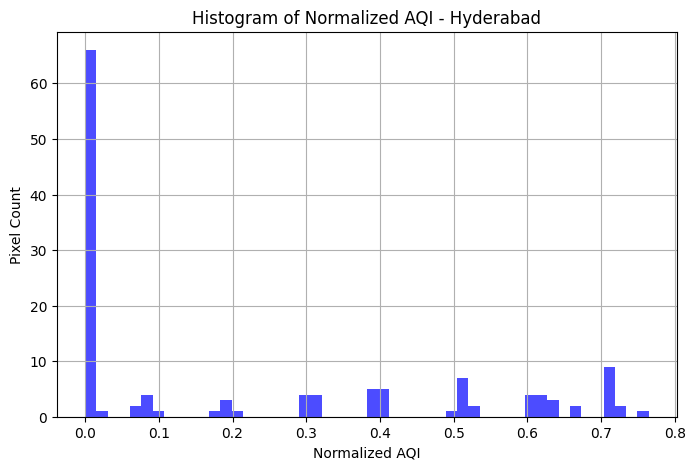

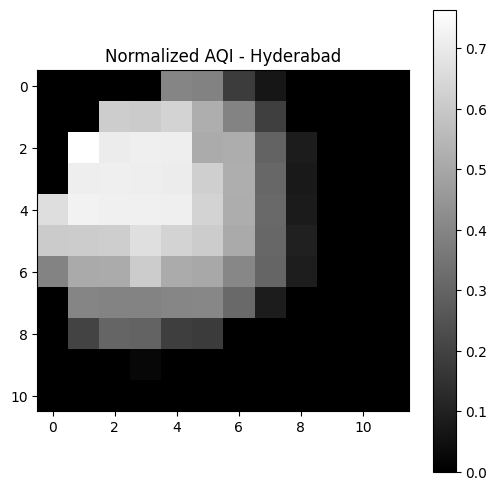

Indore - Original Min: 0.0, Original Max: 0.00010022208491126938
Indore - Normalized Min: 0.0, Normalized Max: 0.8550504539243754
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Indore_AQI_Normalized.tif


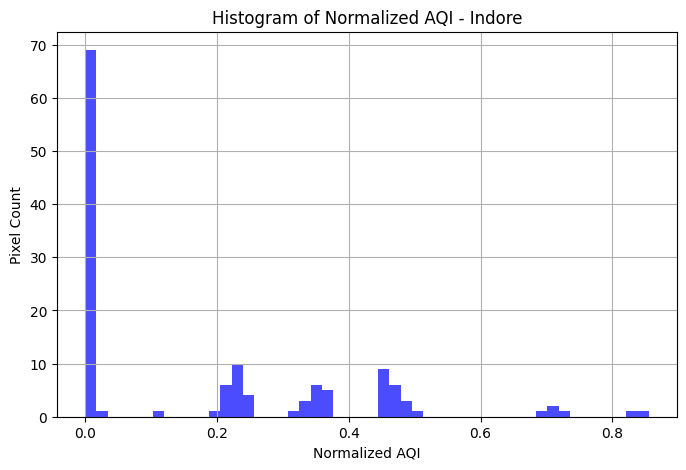

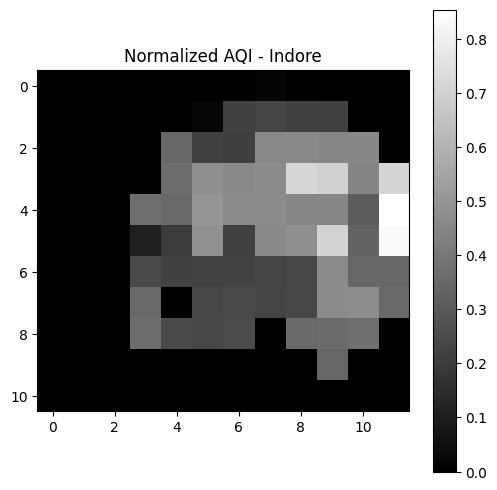

Jaipur - Original Min: 0.0, Original Max: 0.00010025511989932523
Jaipur - Normalized Min: 0.0, Normalized Max: 0.8885197781892763
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Jaipur_AQI_Normalized.tif


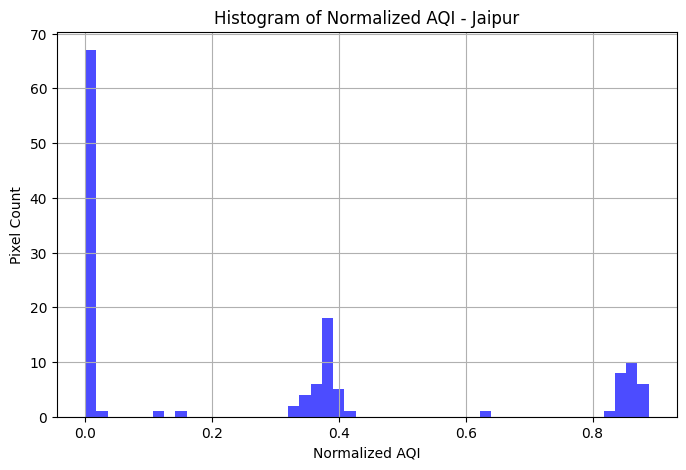

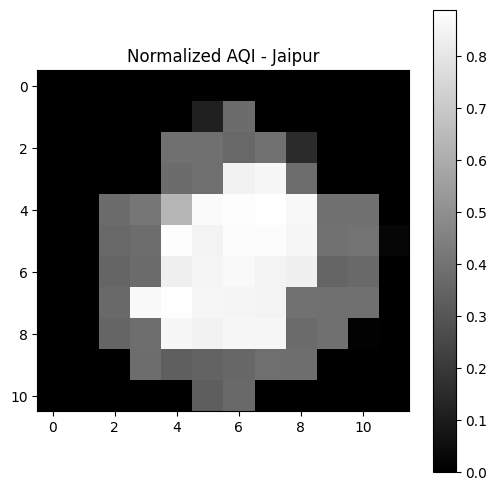

Kolkata - Original Min: 0.0, Original Max: 0.0001317929498674253
Kolkata - Normalized Min: 0.0, Normalized Max: 0.8061665300135501
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Kolkata_AQI_Normalized.tif


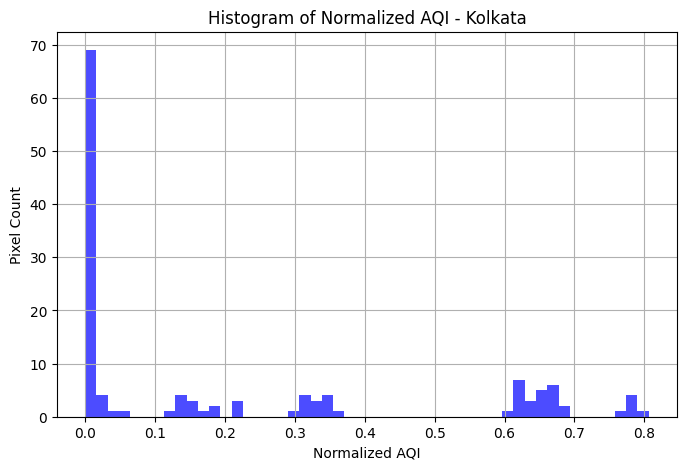

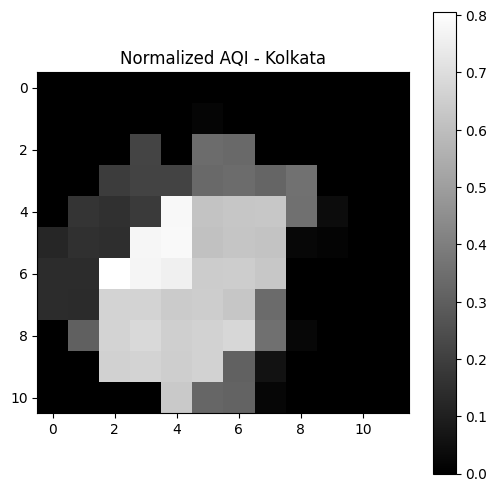

Mumbai - Original Min: 0.0, Original Max: 0.00013163610603434583
Mumbai - Normalized Min: 0.0, Normalized Max: 0.918278133895289
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Mumbai_AQI_Normalized.tif


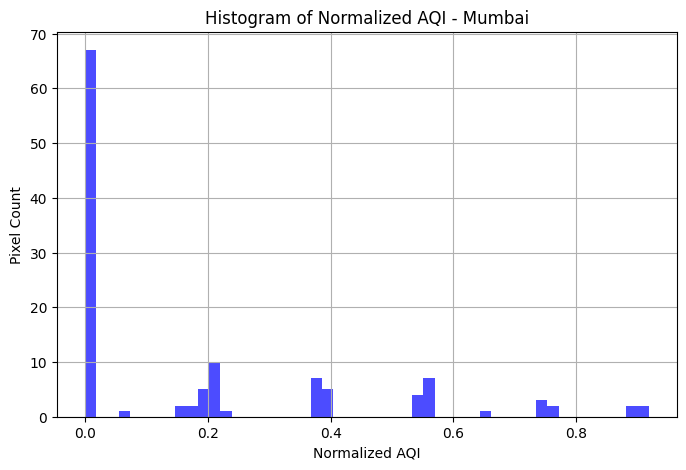

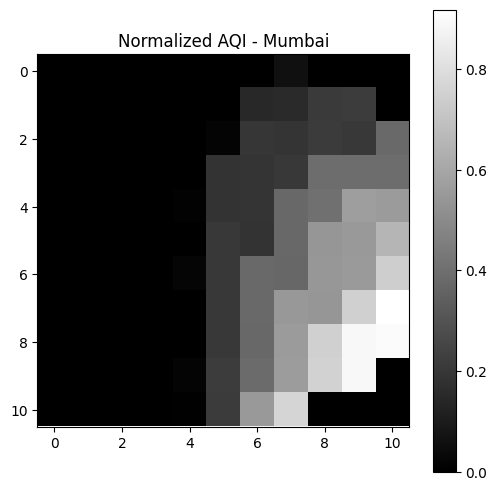

Pune - Original Min: 0.0, Original Max: 9.819386643700928e-05
Pune - Normalized Min: 0.0, Normalized Max: 1.0
  ✅ Saved: /content/drive/MyDrive/FinalMNAQI_Normalized/Pune_AQI_Normalized.tif


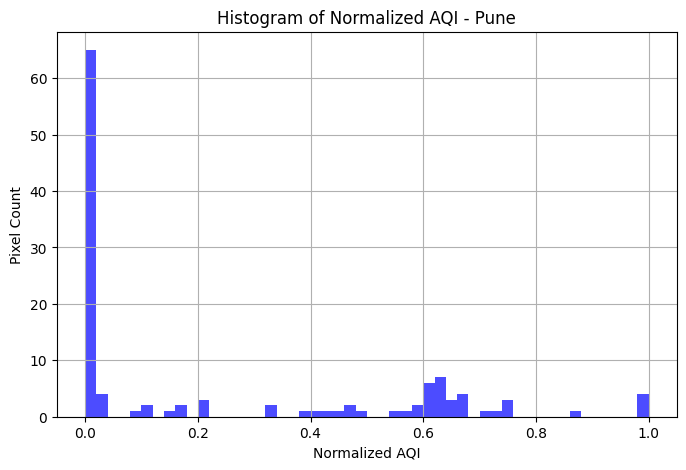

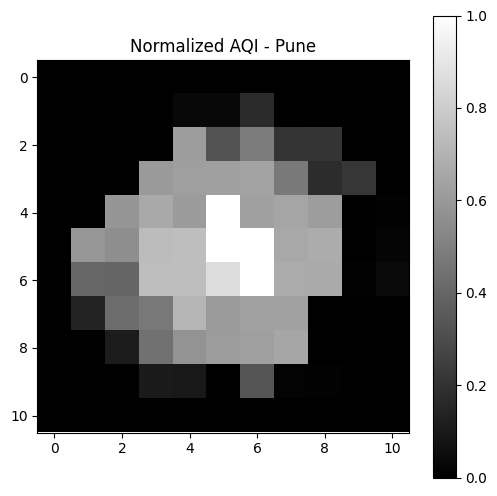


✅ Normalization complete! All files are saved in Google Drive.


In [34]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Define input & output folders
input_folder = "/content/drive/MyDrive/GEE_AQI_Images"
output_folder = "/content/drive/MyDrive/FinalMNAQI_Normalized"
os.makedirs(output_folder, exist_ok=True)

cities = ["Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Hyderabad",
          "Indore", "Jaipur", "Kolkata", "Mumbai", "Pune"]

for city in cities:
    tif_path = os.path.join(input_folder, f"{city}_AQI.tif")
    output_path = os.path.join(output_folder, f"{city}_AQI_Normalized.tif")

    if os.path.exists(tif_path):
        with rasterio.open(tif_path) as src:
            img_data = src.read(1)
            img_data = np.nan_to_num(img_data)  # Replace NaNs with 0

            # Print raw AQI values before processing
            city_min, city_max = img_data.min(), img_data.max()
            print(f"{city} - Original Min: {city_min}, Original Max: {city_max}")

            # 🔹 Step 1: Apply Log Scaling (Avoids Zero Collapse)
            img_data = np.log1p(img_data * 1e6)  # Scale up before log transform

            # 🔹 Step 2: Apply Robust Scaling (Handles Outliers)
            img_flat = img_data.flatten().reshape(-1, 1)  # Reshape for scaler
            scaler = RobustScaler()
            scaled_data = scaler.fit_transform(img_flat).reshape(img_data.shape)

            # 🔹 Step 3: Normalize to [0,1] with Clipping
            normalized_data = np.clip(scaled_data, 0, 1)

            print(f"{city} - Normalized Min: {normalized_data.min()}, Normalized Max: {normalized_data.max()}")

            # Save the normalized TIF file
            with rasterio.open(output_path, "w", driver="GTiff",
                               height=img_data.shape[0], width=img_data.shape[1],
                               count=1, dtype=normalized_data.dtype,
                               crs=src.crs, transform=src.transform) as dst:
                dst.write(normalized_data, 1)

        print(f"  ✅ Saved: {output_path}")

        # Plot histogram to visualize normalization
        plt.figure(figsize=(8, 5))
        plt.hist(normalized_data.flatten(), bins=50, color="blue", alpha=0.7)
        plt.xlabel("Normalized AQI")
        plt.ylabel("Pixel Count")
        plt.title(f"Histogram of Normalized AQI - {city}")
        plt.grid(True)
        plt.show()

        # Plot the normalized AQI map
        plt.figure(figsize=(6, 6))
        plt.imshow(normalized_data, cmap="gray")
        plt.colorbar()
        plt.title(f"Normalized AQI - {city}")
        plt.show()
    else:
        print(f"  ❌ File not found for {city}")

print("\n✅ Normalization complete! All files are saved in Google Drive.")


In [36]:
from PIL import Image
import rasterio

# Open the image using rasterio
with rasterio.open("/content/drive/MyDrive/FinalMNAQI_Normalized/Delhi_AQI_Normalized.tif") as dataset:
    # Read the image data as a NumPy array
    image_data = dataset.read(1)  # Assuming a single-band image

    # Convert the NumPy array to a Pillow Image object
    image = Image.fromarray(image_data)

# Get dimensions
print("Image Size:", image.size)  # Output will be (width, height)

Image Size: (12, 11)


In [37]:
import os
from PIL import Image
import numpy as np
import rasterio

# Define input and output directories
input_folder = "/content/drive/MyDrive/FinalMNAQI_Normalized"
output_folder = "/content/drive/MyDrive/Resized_AQI_Normalized"

# Create output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all .tif files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".tif"):  # Process only .tif files
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Open the image using rasterio
        with rasterio.open(input_path) as dataset:
            image_data = dataset.read(1)  # Read as NumPy array

        # Convert NumPy array to PIL image
        image = Image.fromarray(image_data)

        # Resize to (128, 128)
        resized_image = image.resize((128, 128), Image.Resampling.LANCZOS)

        # Convert back to NumPy array if needed
        resized_array = np.array(resized_image)

        # Save resized image
        resized_image.save(output_path)

        print(f"Resized and saved: {filename}")

print("✅ All images resized and saved in:", output_folder)


Resized and saved: Ahmedabad_AQI_Normalized.tif
Resized and saved: Bengaluru_AQI_Normalized.tif
Resized and saved: Chennai_AQI_Normalized.tif
Resized and saved: Delhi_AQI_Normalized.tif
Resized and saved: Hyderabad_AQI_Normalized.tif
Resized and saved: Indore_AQI_Normalized.tif
Resized and saved: Jaipur_AQI_Normalized.tif
Resized and saved: Kolkata_AQI_Normalized.tif
Resized and saved: Mumbai_AQI_Normalized.tif
Resized and saved: Pune_AQI_Normalized.tif
✅ All images resized and saved in: /content/drive/MyDrive/Resized_AQI_Normalized


In [38]:
from PIL import Image
img = Image.open("/content/drive/MyDrive/Resized_AQI_Normalized/Delhi_AQI_Normalized.tif")
print(img.size)  # Should print (128, 128)


(128, 128)
